In [1]:
# import torch
# import torch.nn as nn
# from torch.utils.data import Dataset
# from torchvision import datasets, models, transforms
# import cv2
# from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [2]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

# font setting
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}
font_label = {'family': 'NanumBarunGothic', 'size': 12, 'color': 'black'}

NanumBarunGothic


In [3]:
# 결과 로그파일 불러오기
try:
    res_df = pd.read_csv('result-log.csv')
except:
    res_df = pd.DataFrame(columns=cols)

---
# PLOT

acc-bbox


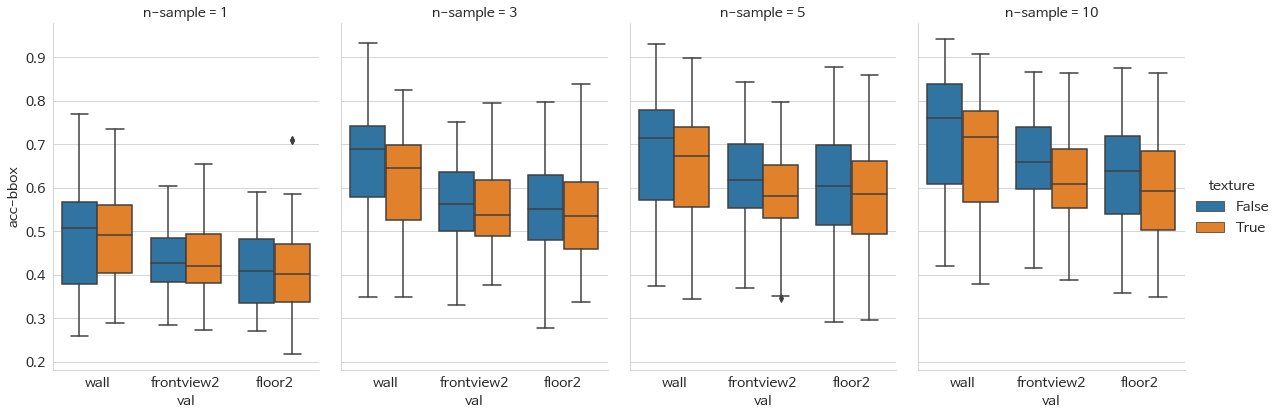

In [212]:
data = res_df
# data = res_df[res_df['memo'].astype(str).apply(lambda x: x.split(' ')[0]!='slidewindow')]
# data = res_df[res_df['memo'].astype(str).apply(lambda x: x.find('slidewindow')==-1)]
# data = data[data['texture']]

# data['algorithm'] = res_df['memo'].astype(str).apply(lambda x: x.split(' ')[0])

print('acc-bbox')
sns.catplot(x="val", y="acc-bbox",
              hue='texture', col="n-sample", 
#             hue_order=['trimed-frontview', 'trimed-floor', 'trimed-offic', 'original-frontview', 'original-floor', 'original-office'],
                 data=data, kind="box",
                 height=6, aspect=.7)
plt.show()

# print('mAP')
# data = data[data['mAP']!=-1]
# sns.catplot(x="val", y="mAP",
#                  hue="ref", col="n-sample", hue_order=['trimed-frontview', 'trimed-floor', 'trimed-offic', 'original-frontview', 'original-floor', 'original-office'],
#                  data=data, kind="point",
#                  height=6, aspect=.7)
# plt.show()

In [145]:
plt.rcParams['font.size']=14
print (plt.rcParams['font.size'] )

14.0


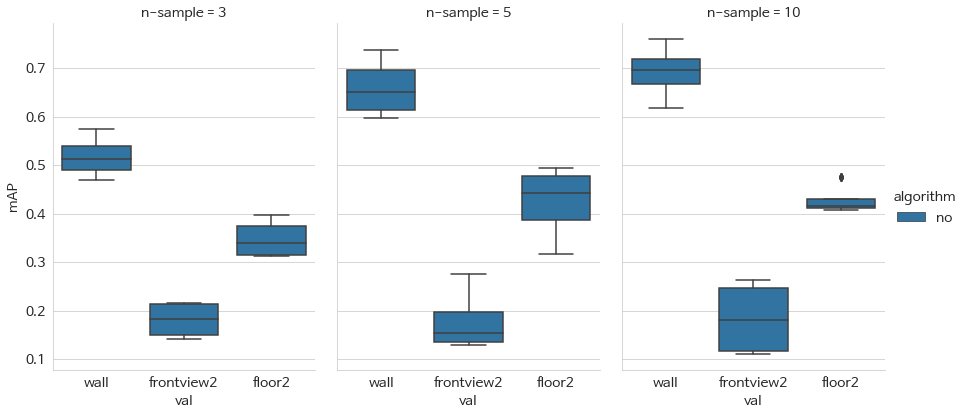

acc-bbox


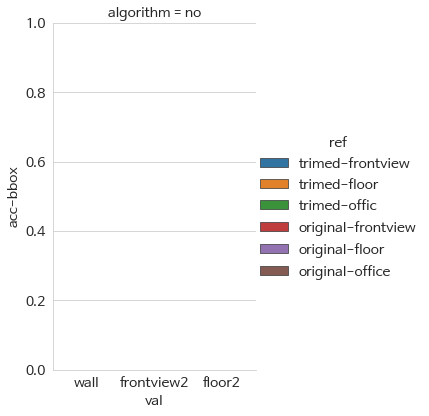

mAP


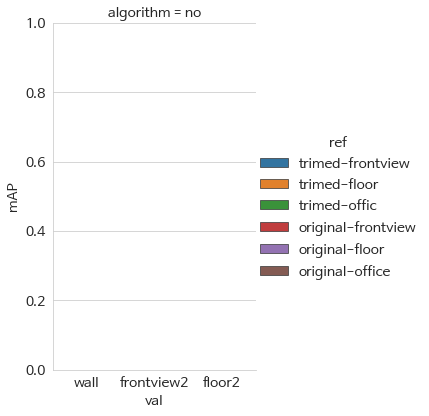

In [185]:
data = res_df#[(res_df['n-sample']==10) & (res_df['ref']!='original-office')]
data['algorithm'] = res_df['ref'].apply(lambda x: x.split('-')[0])
data = data[data['mAP']!=-1]
sns.catplot(x="val", y="mAP",
                 hue="algorithm", col="n-sample",
                 data=data, kind="box",
                 height=6, aspect=.7)
# plt.subplots(figsize=(12,6))
# sns.boxplot(x="val", y="acc-bbox", hue="texture", data=data)#, order=['no slide window', 'slidewindow n=7 mode=all', 'slidewindow n=7 mode=first'])
# plt.title('title', fontdict=font_title)
plt.show()

print('acc-bbox')
sns.catplot(x="val", y="acc-bbox",
                 hue="ref", col="algorithm", hue_order=['trimed-frontview', 'trimed-floor', 'trimed-offic', 'original-frontview', 'original-floor', 'original-office'],
                 data=data, kind="box",
                 height=6, aspect=.7)
plt.show()


print('mAP')
data = data[data['mAP']!=-1]
sns.catplot(x="val", y="mAP",
                 hue="ref", col="algorithm", hue_order=['trimed-frontview', 'trimed-floor', 'trimed-offic', 'original-frontview', 'original-floor', 'original-office'],
                 data=data, kind="box",
                 height=6, aspect=.7)
plt.show()

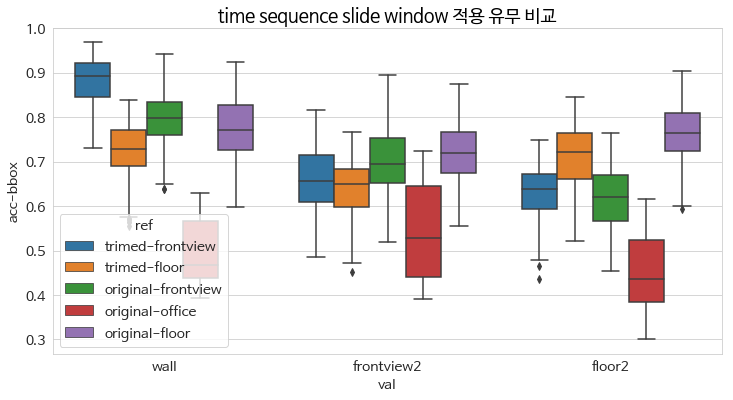

In [147]:
data = res_df
data['algo'] = res_df['ref'].apply(lambda x: x.split('-')[0])
plt.subplots(figsize=(12,6))
sns.boxplot(x="val", y="acc-bbox", hue="ref", data=data)#, order=['no slide window', 'slidewindow n=7 mode=all', 'slidewindow n=7 mode=first'])
plt.title('time sequence slide window 적용 유무 비교', fontdict=font_title)
plt.show()

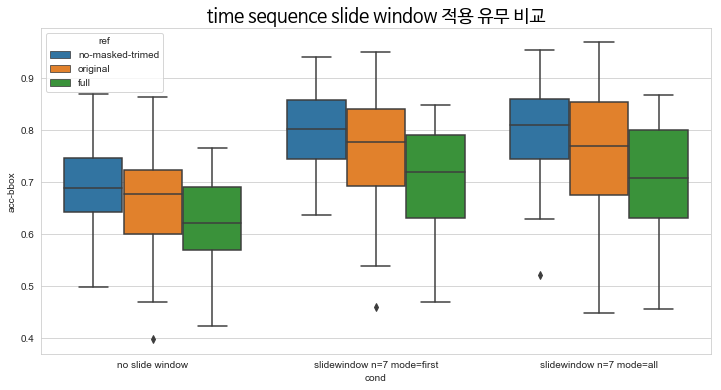

In [108]:
import seaborn as sns
sns.set_style("whitegrid")
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}

# data = res_df2.loc[idxs]
data = res_df.copy()
data['cond'] = data['memo'].fillna('no slide window')
# data = data[(data['condition']=='no slide window') | (data['condition']=='slidwindow n=7, mode=first') | (data['condition']=='slidwindow n=7, mode=all') ]
data = data[(data['cond']=='no slide window') | (data['memo']=='slidewindow n=7 mode=first') | (data['memo']=='slidewindow n=7 mode=all')]
# data = data[(data['n-sample']==30)]
# data = data[(data['knn']==True)]

plt.subplots(figsize=(12,6))
sns.boxplot(x="cond", y="acc-bbox", hue="ref", data=data)#, order=['no slide window', 'slidewindow n=7 mode=all', 'slidewindow n=7 mode=first'])
# plt.show()
# sns.boxplot(x="cond", y="acc-bbox", hue="ref", data=data)#, order=['no slide window', 'slidewindow n=7 mode=all', 'slidewindow n=7 mode=first'])
# plt.xticks(rotation=45)
plt.title('time sequence slide window 적용 유무 비교', fontdict=font_title)
plt.show()

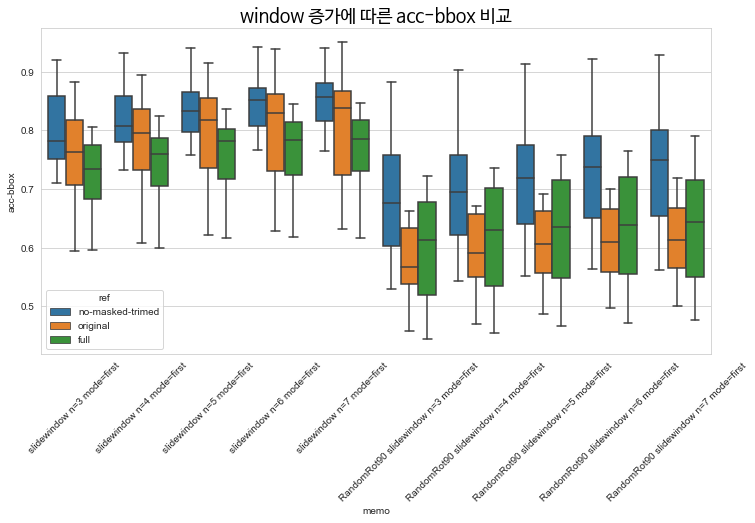

In [61]:
m = res_df['memo'].apply(lambda x: str(x).find('mode=first')!=-1)
data =res_df[m]

data = data[(data['n-sample']==30)]
# data = data[(data['knn']==True)]

plt.subplots(figsize=(12,6))
sns.boxplot(x="memo", y="acc-bbox", hue='ref', data=data)
# plt.show()
# sns.boxplot(x="memo", y="acc-bbox", hue='ref', data=data)
plt.xticks(rotation=45)
plt.title('window 증가에 따른 acc-bbox 비교', fontdict=font_title)
plt.show()

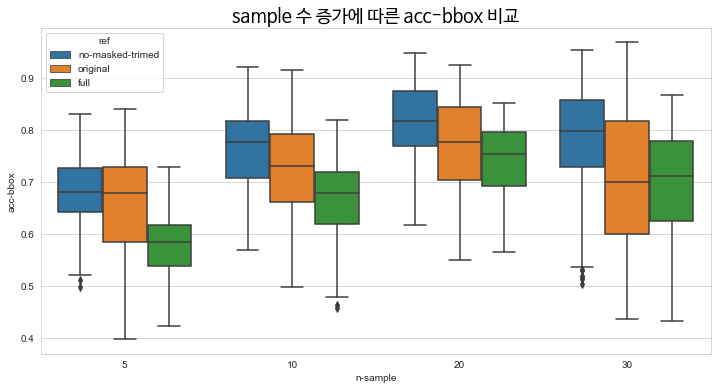

In [47]:
# m = res_df['memo'].apply(lambda x: str(x).find('RandomRot90')==-1)
# data = res_df[m]
data = res_df
# data = data[(data['n-sample']==10)]
# data = data[(data['knn']==True)]

plt.subplots(figsize=(12,6))
# plt.xticks(rotation=45)
sns.boxplot(x="n-sample", y="acc-bbox", hue="ref", data=data, order=[5,10,20,30])
# sns.catplot(x="n-sample", y="acc-bbox", hue="ref", data=data)

# plt.show()
# sns.boxplot(x="n-sample", y="acc-bbox", hue="ref", data=data, order=[5,10,20,30])

plt.title('sample 수 증가에 따른 acc-bbox 비교', fontdict=font_title)
plt.show()

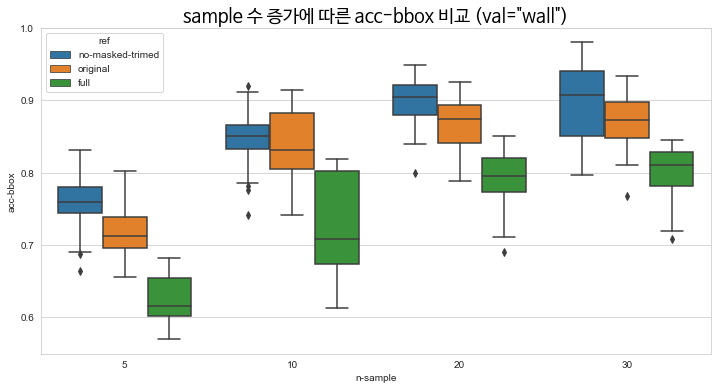

In [117]:
m = res_df['memo'].apply(lambda x: str(x).find('RandomRot90')==-1)
data = res_df[m]
# data = data[(data['n-sample']==10)]
data = data[(data['knn']==True)]
data = data[data["val"]=='wall']

plt.subplots(figsize=(12,6))
# plt.xticks(rotation=45)
sns.boxplot(x="n-sample", y="acc-bbox", hue="ref", data=data, order=[5,10,20,30])
# sns.catplot(x="n-sample", y="acc-bbox", hue="ref", data=data)

# plt.show()
# sns.boxplot(x="n-sample", y="acc-bbox", hue="ref", data=data, order=[5,10,20,30])

plt.title('sample 수 증가에 따른 acc-bbox 비교 (val="wall")', fontdict=font_title)
plt.show()

---
# detection

In [43]:

# no-masked-trimed
mask = [a and b and c for a,b,c in 
        zip(res_df['val']=='floor2', res_df['n-sample']==30, res_df['knn']==True)]
m = (res_df['val']=='wall') & (res_df['ref']=='masked-trimed') & (res_df['knn']==True) 

res_df[mask]
# res_df[res_df['val']=='office']

,timestamp,ref,val,n-sample,knn,threshold,n-box,acc-full,acc-bbox,mAP,...,TP21,TP22,TP23,TP24,TP25,TP26,TP27,TP28,TP29,TP30
205,2019-11-14 23:58:36.185233,no-masked-trimed,floor2,30,True,0.83,200,0.492278,0.698842,0.476441,...,20.0,1.0,3.0,2.0,0.0,1.0,9.0,10.0,3.0,5.0
207,2019-11-15 00:04:13.340521,original,floor2,30,True,0.83,200,0.559846,0.737452,0.441391,...,7.0,2.0,5.0,3.0,5.0,1.0,6.0,10.0,5.0,12.0
209,2019-11-15 00:09:36.611341,full,floor2,30,True,0.83,200,0.635135,0.750965,0.442441,...,16.0,3.0,4.0,1.0,6.0,3.0,10.0,13.0,7.0,8.0
211,2019-11-15 00:18:34.927604,no-masked-trimed,floor2,30,True,0.83,200,0.272201,0.824324,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,2019-11-15 00:19:41.982090,original,floor2,30,True,0.83,200,0.277992,0.911197,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,2019-11-15 00:20:53.837766,full,floor2,30,True,0.83,200,0.301158,0.845560,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,2019-11-15 00:23:12.935602,no-masked-trimed,floor2,30,True,0.83,200,0.241313,0.837838,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,2019-11-15 00:24:18.802590,original,floor2,30,True,0.83,200,0.237452,0.880309,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,2019-11-15 00:25:30.832241,full,floor2,30,True,0.83,200,0.335907,0.859073,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,2019-11-15 00:26:36.142959,no-masked-trimed,floor2,30,True,0.83,200,0.216216,0.826255,-1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# from IPython.core.display import HTML
# display(HTML(res_df.to_html()))

# plot위해 클래스 이름 줄이기
val_dataset = MyDataset(allpath['detectionValPath']['wall'], allpath['classPath'])
class_trun = [c.split('-')[0]+'-'+c.split('-')[1][:3] for c in val_dataset.classes]

n1=245 # no-mask-trim
n2=251 # original
n3=257 # full
res_df.iloc[[n1,n2,n3], 1:10]

,ref,val,n-sample,knn,threshold,n-box,acc-full,acc-bbox,mAP
245,no-masked-trimed,floor2,30,True,0.83,200,0.484556,0.696911,0.471945
251,original,floor2,30,True,0.83,200,0.552124,0.743243,0.374025
257,full,floor2,30,True,0.83,200,0.625483,0.689189,0.425176


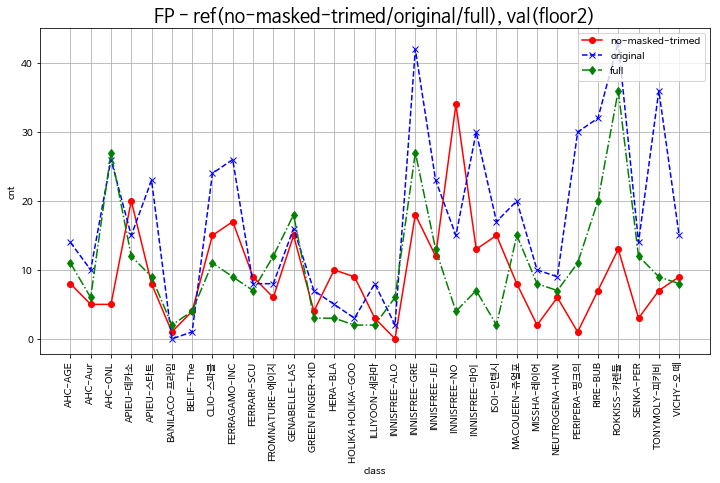

In [45]:
FPs1 = res_df.iloc[n1,42:73]
FPs2 = res_df.iloc[n2,42:73]
FPs3 = res_df.iloc[n3,42:73]

font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}
plt.subplots(figsize=(12,6))
plt.plot(FPs1, c='r', marker='o', label=res_df.iloc[n1,1])
plt.plot(FPs2, c='b', marker='x', ls='--', label=res_df.iloc[n2,1])
plt.plot(FPs3, c='g', marker='d', ls='-.', label=res_df.iloc[n3,1])
plt.xticks(range(len(val_dataset.classes)), class_trun, rotation=90)
plt.xlabel('class')
plt.ylabel('cnt')
# plt.ylim([0,20])
plt.grid()
plt.title('FP - ref(%s/%s/%s), val(%s)'%(res_df.iloc[n1,1], res_df.iloc[n2,1], res_df.iloc[n3,1], res_df.iloc[n1,2]), fontdict=font_title)
plt.legend(loc='upper right')
plt.show()

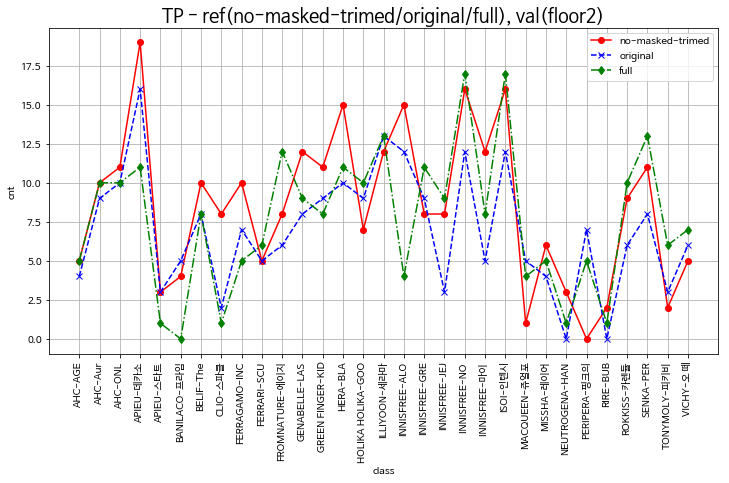

In [46]:
TPs1 = res_df.iloc[n1,73:]
TPs2 = res_df.iloc[n2,73:]
TPs3 = res_df.iloc[n3,73:]

font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}
plt.subplots(figsize=(12,6))
plt.plot(TPs1, c='r', marker='o', label=res_df.iloc[n1,1])
plt.plot(TPs2, c='b', marker='x', ls='--', label=res_df.iloc[n2,1])
plt.plot(TPs3, c='g', marker='d', ls='-.', label=res_df.iloc[n3,1])
plt.xticks(range(len(val_dataset.classes)), class_trun, rotation=90)
plt.xlabel('class')
plt.ylabel('cnt')
# plt.ylim([0,20])
plt.grid()
plt.title('TP - ref(%s/%s/%s), val(%s)'%(res_df.iloc[n1,1], res_df.iloc[n2,1], res_df.iloc[n3,1], res_df.iloc[n1,2]), fontdict=font_title)
plt.legend(loc='upper right')
plt.show()

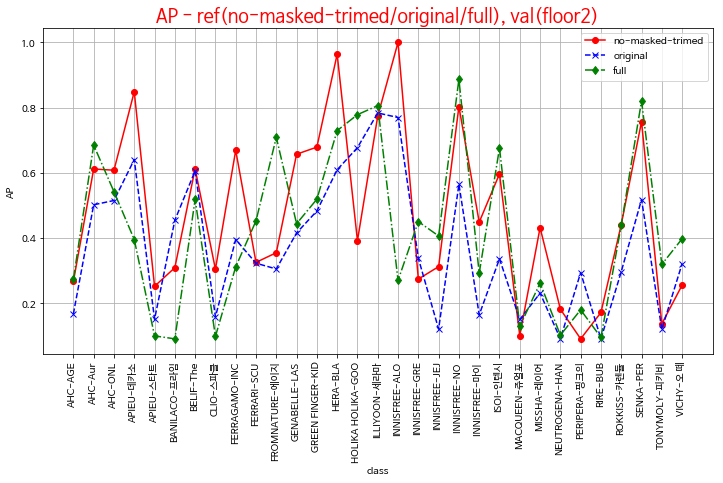

In [47]:
APs1 = res_df.iloc[n1,11:42]
APs2 = res_df.iloc[n2,11:42]
APs3 = res_df.iloc[n3,11:42]

font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color':  'red'}
plt.subplots(figsize=(12,6))
plt.plot(APs1, c='r', marker='o', label=res_df.iloc[n1,1])
plt.plot(APs2, c='b', marker='x', ls='--', label=res_df.iloc[n2,1])
plt.plot(APs3, c='g', marker='d', ls='-.', label=res_df.iloc[n3,1])
plt.xticks(range(len(val_dataset.classes)), class_trun, rotation=90)
plt.xlabel('class')
plt.ylabel('AP')
# plt.ylim([0,20])
plt.grid()
plt.title('AP - ref(%s/%s/%s), val(%s)'%(res_df.iloc[n1,1], res_df.iloc[n2,1], res_df.iloc[n3,1], res_df.iloc[n1,2]), fontdict=font_title)
plt.legend(loc='upper right')
plt.show()

In [113]:

print('**********detection***********')
# ---------------------------- val set 로드 ---------------------------------
voc_val_dataset = MyDataset(detect_ref_dir, class_path, 
        transform=transforms.Compose([
        transforms.ToTensor()
    ]))

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
# assert val_dataset.classes==sample_dir_list, "샘플링 클래스와 데이터로더 클래스가 다름"
# ---------------------------- val set 정확도 측정 ---------------------------------

fps=0
# model.threshold = 0.9*0.08 #0.85 #0.4
SHOW_IMAGE = True # 이미지 볼지 말지
dfs = {c:pd.DataFrame(columns=['image', 'confidience', 'TP', 'IOU']) for c in voc_val_dataset.classes} # average precision 저장
target_all = [] #ground truth bboxs

# print('[num_class]:', len(sample_dir_list), sample_dir_list)
for i in tqdm(np.random.permutation(len(voc_val_dataset))):
    startTime = time.time()
    data, targets_gt, boxes_gt = voc_val_dataset[i] # 정답 데이터, 레이블, bbox

    frame = data.clone().detach().mul(255).squeeze().numpy().astype(np.uint8).transpose([1,2,0])
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # opencv image need to convert BGR -> RGB

    im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
    featuremaps = model(im_tensor)
    target_all = np.concatenate([target_all,  targets_gt])

    # region proposal network extracts ROIs
    boxes, scores = rpn(frame, num_boxs=n_rpn_box, scale=1, min_score=0.04)
    cv2.putText(frame, str(len(boxes)), (data.shape[-1]-80,30), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,100,225), thickness=2) # rpn생성 box 개수

    if SHOW_IMAGE:    
        # render ground truth roi prediction
#         cv2.putText(frame, str(float(preds_dist.mean()))[:5], (20,30), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,200,225), thickness=2) # roi평균 유사도
        _boxes_gt_cuda = torch.from_numpy(boxes_gt).float().cuda()
        rois_gt = get_rois(im_tensor, featuremaps, _boxes_gt_cuda)
        preds_gt, pred_dists_gt = model.inference_tensor3(rois_gt, 'cos', knn=USE_KNN)    
        for pred, dist, b in zip(preds_gt[:,0], pred_dists_gt[:,0], boxes_gt):
            pred_label = voc_val_dataset.classes[pred]
            res_text = "("+str(float(dist))[:5]+")"+pred_label
            x, y, w, h = b
            cv2.putText(frame, res_text, (x+3, y+12), cv2.FONT_HERSHEY_SIMPLEX, fontScale=.5, color=(255,0,255), thickness=1)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)  

    # inference scores, boxes
    _boxes_cuda = torch.from_numpy(boxes).float().cuda()
    rois = get_rois(im_tensor, featuremaps, _boxes_cuda)
    preds, preds_dist= model.inference_tensor3(rois, 'cos', knn=USE_KNN)

#     # make new scores
#     scores = torch.from_numpy(scores).to(model.device)
#     preds_dist = preds_dist*scores

    # objectness filterling
    filter_idx = (preds_dist[:,0]>model.threshold).type(torch.bool).cpu()
    if any(filter_idx): # 필터 통과하는거 하나라도 있어야 함
        _boxes_cuda = _boxes_cuda[filter_idx]
        preds = preds[filter_idx]
        preds_dist = preds_dist[filter_idx]
        rois = rois[filter_idx]

        for i in range(1):
            boxes_cuda = _boxes_cuda.clone().detach()
            if i==1:
                # UBBR adjusted bboxes
                offsets = UBBR_model.fc(rois) 
        #                 offsets = UBBR_model(im_tensor, offsets)        
                # reg 적용한 random boxes
                boxes_cuda = regression_transform(boxes_cuda, offsets)

            # non-maximum-suppression
            bboxes_all = np.array(list(zip(boxes_cuda.cpu(), preds.cpu().numpy()[:,0], preds_dist.cpu().numpy()[:,0])), dtype=np.object)
            bboxes_all_nms = []
            for cls in set(bboxes_all[:,1]):
                bboxes_all_nms.append(non_max_sup_one_class(bboxes_all[bboxes_all[:,1]==cls], threshold=0.05, descending=model.sort_order_descending))
            bboxes_all_nms = np.concatenate(bboxes_all_nms)

            # render frame
            if SHOW_IMAGE:
                for idx, (box, pred, dist) in enumerate(bboxes_all_nms):
                    pred_label = model.reference_classes[pred]
                    res_text = "("+str(float(dist))[:5]+")"+pred_label
                    x, y, w, h = box
                    if i==1: cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 1, cv2.LINE_AA) # UBBR
                    else: cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 1, cv2.LINE_AA)
                    cv2.putText(frame, res_text, (x+3, y+12), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,225), 1)        

        # collect statistics for mAP
        # ans data - targets_gt, boxes_gt, filename_gt
        for t in set(targets_gt): # iterate all class
            bboxes_all_nms_per_class = bboxes_all_nms[bboxes_all_nms[:,1]==t]
            boxes_gt_per_class = boxes_gt[targets_gt==t]

            boxes_model = bboxes_all_nms_per_class[:,0]
            confidiences_model = bboxes_all_nms_per_class[:,2]
            _df = calc_tp_state(boxes_gt_per_class, boxes_model, confidiences_model, filename='filename_gt') # class 하나만 가정, 
            _class = voc_val_dataset.classes[t]
            dfs[_class] = dfs[_class].append(_df, ignore_index=True) # update df 

    # only render UI
    if SHOW_IMAGE:
        # frame = cv2.resize(frame, (int(frame.shape[1]*1.5), int(frame.shape[0]*1.5)), interpolation=cv2.INTER_CUBIC)
        cv2.imshow('frame',frame)
        k = cv2.waitKey(0) & 0xff 
        if k == 27: # esc
            break

    endTime = time.time()
    fps = int(1/(endTime - startTime))

cv2.destroyAllWindows()        

**********detection***********


A Jupyter Widget